In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import fastai
from fastai.vision import *

%matplotlib inline

## Data

In [8]:
path = './data/flowers/'
bs = 128
tfms = get_transforms(max_warp=0, p_affine=0)
db = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(tfms=tfms, size=128, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs)
     )

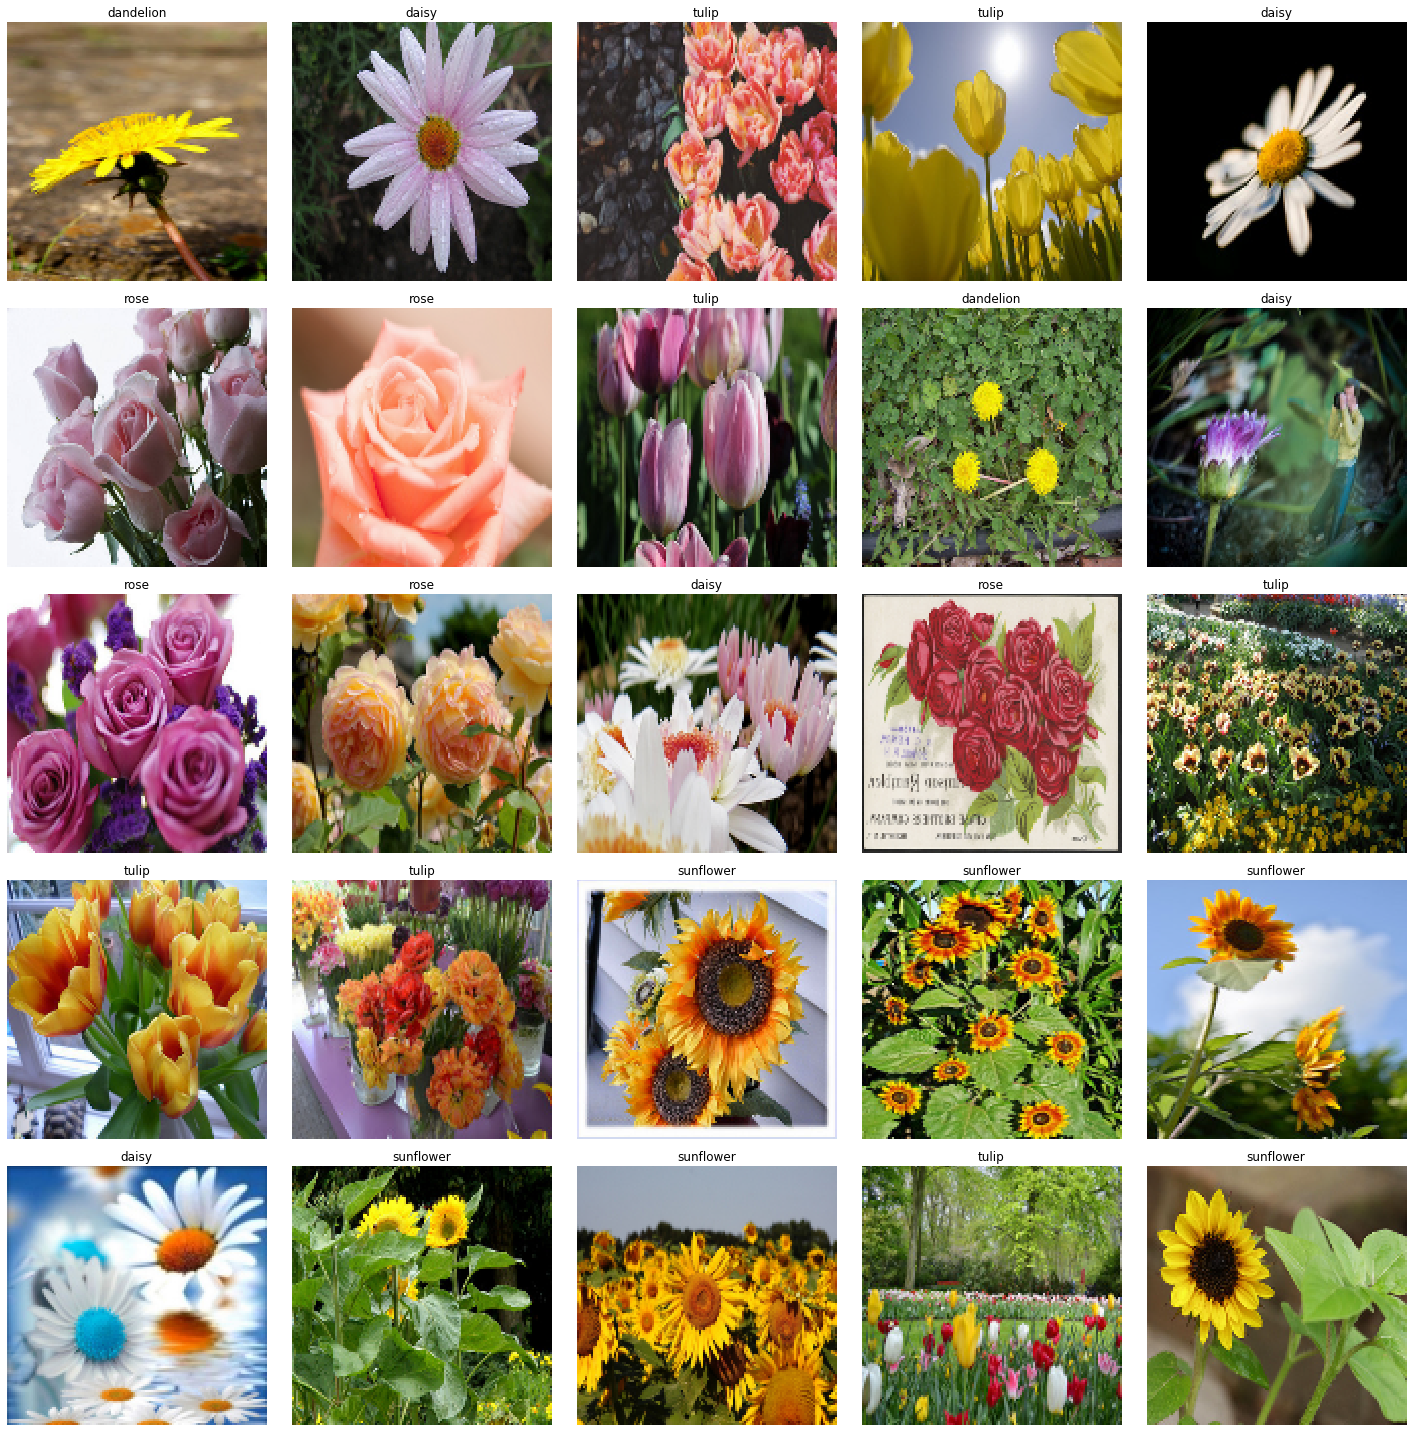

In [9]:
db.show_batch()

In [10]:
db

ImageDataBunch;

Train: LabelList (3459 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
daisy,daisy,daisy,daisy,daisy
Path: data/flowers;

Valid: LabelList (864 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
sunflower,sunflower,sunflower,dandelion,dandelion
Path: data/flowers;

Test: None

## Learner

In [14]:
learn = cnn_learner(db, models.resnet18, metrics=accuracy)

In [15]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [17]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 64]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
______________________________________________________________________
MaxPool2d            [64, 32, 32]         0          False     
______________________________________________________________________
Conv2d               [64, 32, 32]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 32, 32]         128        True      
______________________________________________________________________
ReLU                 [64, 32, 32]         0          False     
___________________________________________________

## Train

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


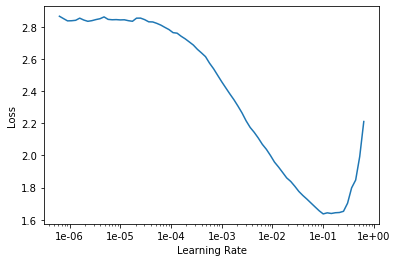

In [16]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5, max_lr=2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.688788,0.567952,0.817130,03:54
1,1.043100,0.490435,0.847222,03:48
2,0.734769,0.456198,0.871528,03:40
3,0.546199,0.428296,0.866898,03:42
4,0.433749,0.429919,0.870370,03:42


## Check stated accuracy above on valid ds

In [32]:
y_pred, y_true = get_preds(learn.model, db.valid_dl)
correct = y_pred.argmax(dim=-1) == y_true
acc = int(correct.sum()) / len(correct)
print(f'Accuracy is {acc:.4f}')

Accuracy is 0.8704


## Save Model

In [39]:
learn.save('flowers', return_path=True)

PosixPath('data/flowers/models/flowers.pth')